In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Dados acerca da vacinação do COVID19 (1º e 2º dose) de vários países, obtidas através dos dados disponibilizados pelo ministério da saúde de cada país.


In [3]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Informações sobre a base de dados

In [ ]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,month
0,1,1,0,54,4,60,33705,29992,4226,9614,...,127,38,4,35,15,4673,2675,3305,4765,1
1,1,1,0,55,4,55,33705,29992,4226,9614,...,127,38,4,35,15,4673,2675,3305,4765,1
2,1,1,0,56,4,55,33705,29992,4226,9614,...,127,38,4,35,15,4673,2675,3305,4765,1
3,1,1,0,57,4,55,33705,29992,4226,9614,...,127,38,4,35,15,4673,2675,3305,4765,1
4,1,1,0,58,4,55,33705,29992,4226,9614,...,127,38,4,35,15,4673,2675,3305,4765,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136245,236,0,236,692,34603,55,220,4600,35,35,...,57,37,20,18,33,4673,2675,3305,4765,10
136246,236,0,236,693,34612,128,241,4604,39,38,...,57,37,20,18,33,4673,2675,3305,4765,10
136247,236,0,236,694,34615,82,232,4605,36,39,...,57,37,20,18,33,4673,2675,3305,4765,10
136248,236,0,236,695,34619,117,294,4605,35,39,...,57,37,20,18,33,4673,2675,3305,4765,10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136250 entries, 0 to 136249
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    136250 non-null  object 
 1   continent                                   127568 non-null  object 
 2   location                                    136250 non-null  object 
 3   date                                        136250 non-null  object 
 4   total_cases                                 128722 non-null  float64
 5   new_cases                                   128717 non-null  float64
 6   new_cases_smoothed                          127677 non-null  float64
 7   total_deaths                                117477 non-null  float64
 8   new_deaths                                  117673 non-null  float64
 9   new_deaths_smoothed                         127677 non-null  float64
 

## Modificações nos Datatypes da base

In [4]:
df['date'] = pd.to_datetime(df['date'])

# Para este estudo,
No que tange à pandemia, analisaremos como a vacinação foi eficaz no combate ao número de mortes e infectados em escala continental e territorial. 

# Análise Exploratória

## Novos Casos e Mortes no Brasil desde o Início da Pandemia 

In [ ]:
brasil = df.loc[df['location']=='Brazil']

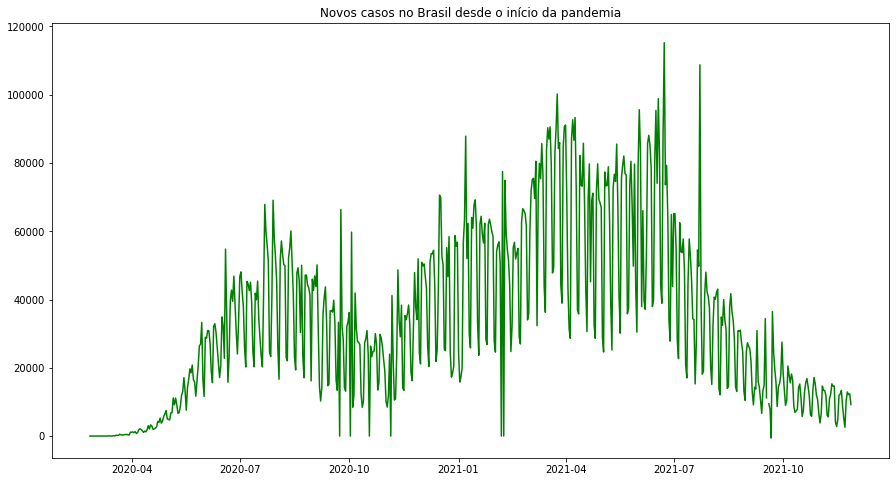

In [ ]:
# title and size
plt.figure(figsize=(15,8))
plt.title('Novos casos no Brasil desde o início da pandemia')

# graphics
plt.plot(brasil['date'], brasil['new_cases'], markerfacecolor='green', markersize=12, color='green')

# show graph
plt.show()

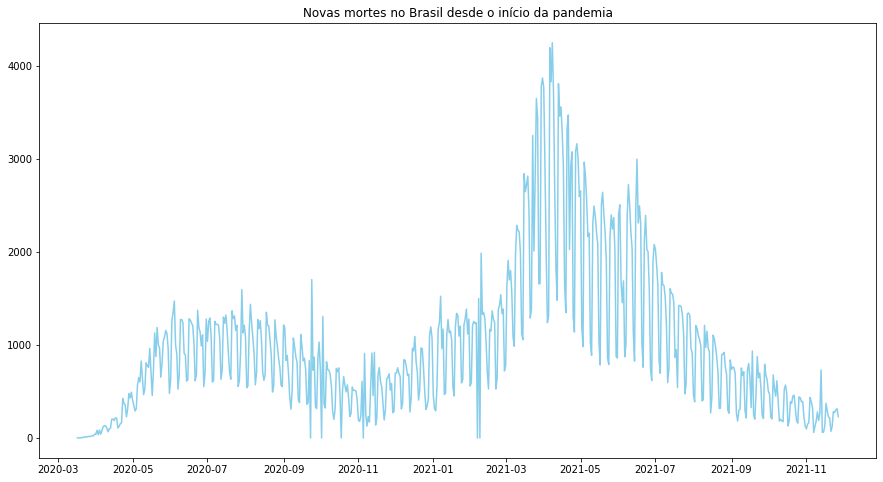

In [ ]:
# title and size
plt.figure(figsize=(15,8))
plt.title('Novas mortes no Brasil desde o início da pandemia')

# graphics
plt.plot(brasil['date'], brasil['new_deaths'], markerfacecolor='blue', markersize=12, color='skyblue')

# show graph
plt.show()

## Vacinação Contra a COVID19 no Brasil

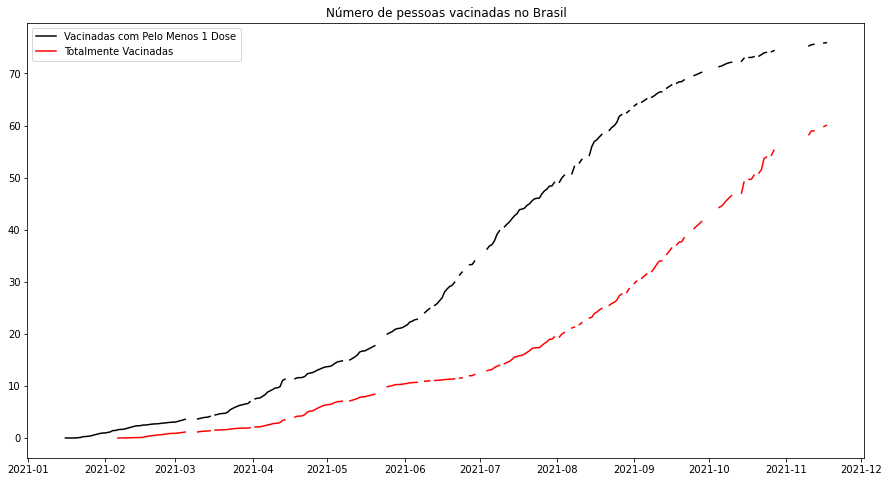

In [ ]:
# title and size
plt.figure(figsize=(15,8))
plt.title('Pessoas vacinadas no Brasil')

# graphics
plt.plot(brasil['date'], brasil['people_vaccinated_per_hundred'], markerfacecolor='black', markersize=12, color='black')
plt.plot(brasil['date'], brasil['people_fully_vaccinated_per_hundred'], markerfacecolor='red', markersize=12, color='red')

plt.legend(labels=['Vacinadas com Pelo Menos 1 Dose', 'Totalmente Vacinadas'])

# show graph
plt.show()

## Número de Casos Totais, Mortes e Pessoas Vacinadas no Brasil

In [ ]:
print('O número total de casos no Brasil é de: {}'.format(int(brasil['new_cases'].sum())))
print('O número total de mortes no Brasil é de: {}'.format(int(brasil['new_deaths'].sum())))
print('O número total de pessoas vacinadas (com pelo menos 1 dose) no Brasil é de: {}'.format(int(brasil['new_vaccinations'].sum())))

O número total de casos no Brasil é de: 21926757
O número total de mortes no Brasil é de: 614186
O número total de pessoas vacinadas (com pelo menos 1 dose) no Brasil é de: 211195098


## Número de Testes já feitos para Detecção da COVID19 no Brasil

In [ ]:
print('O número total de testes feitos no Brasil é de: {}'.format(int(brasil['new_tests'].sum())))

O número total de testes feitos no Brasil é de: 37005491


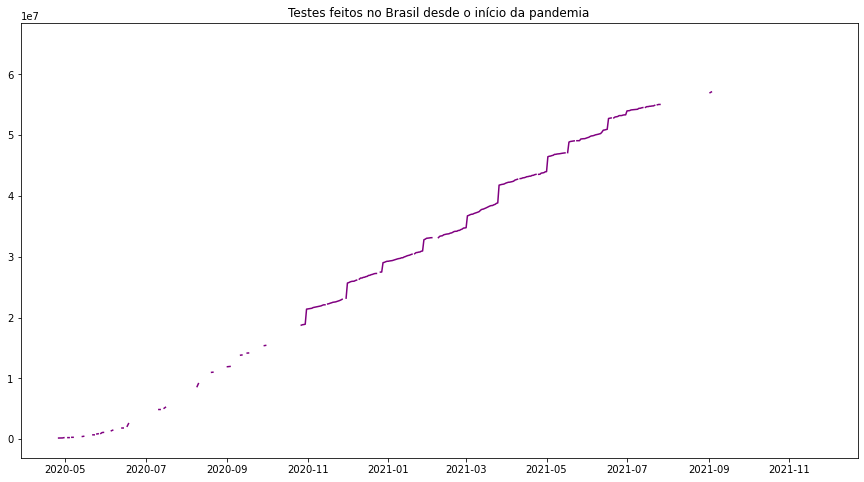

In [ ]:
# title and size
plt.figure(figsize=(15,8))
plt.title('Testes feitos no Brasil desde o início da pandemia')

# graphics
plt.plot(brasil['date'], brasil['total_tests'], markerfacecolor='purple', markersize=12, color='purple')

# show graph
plt.show()

## Comparação do Brasil com outros Países

Para isto foram selecionados os três países mais populosos na escala 300 - 200 milhões de habitantes de acordo com o U.S. Census Bureau Current Population, 
* A fonte das informações está disponível aqui: https://www.census.gov/popclock/print.php?component=counter

In [ ]:
indonesia = df.loc[df['location']=='Indonesia']
pakistan = df.loc[df['location']=='Pakistan']
usa = df.loc[df['location']=='United States']
nigeria = df.loc[df['location']=='Nigeria']

### Novos Casos e Mortes

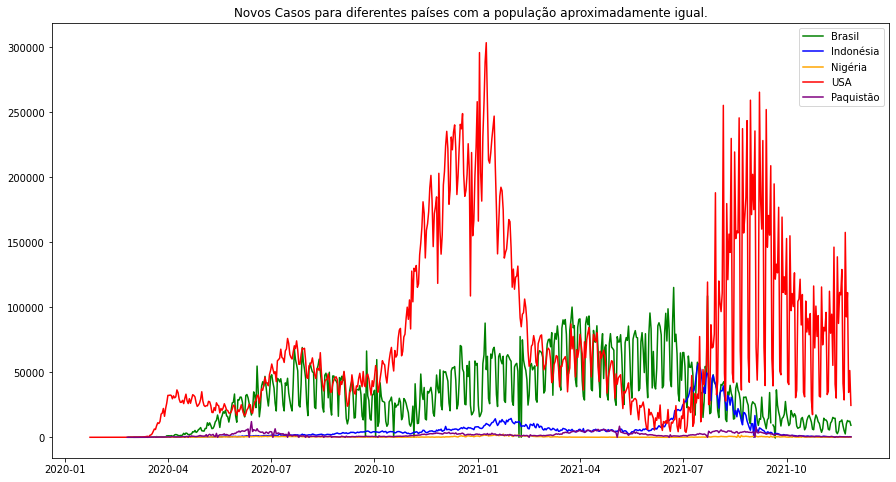

In [ ]:
# title and size
plt.figure(figsize=(15,8))
plt.title('Novos Casos para diferentes países com a população aproximadamente igual.')

# graphics
plt.plot(brasil['date'], brasil['new_cases'], markerfacecolor='green', markersize=12, color='green')
plt.plot(indonesia['date'], indonesia['new_cases'], markerfacecolor='blue', markersize=12, color='blue')
plt.plot(nigeria['date'], nigeria['new_cases'], markerfacecolor='orange', markersize=12, color='orange')
plt.plot(usa['date'], usa['new_cases'], markerfacecolor='red', markersize=12, color='red')
plt.plot(pakistan['date'], pakistan['new_cases'], markerfacecolor='purple', markersize=12, color='purple')

plt.legend(labels=['Brasil', 'Indonésia', 'Nigéria', 'USA', 'Paquistão'])

# show graph
plt.show()

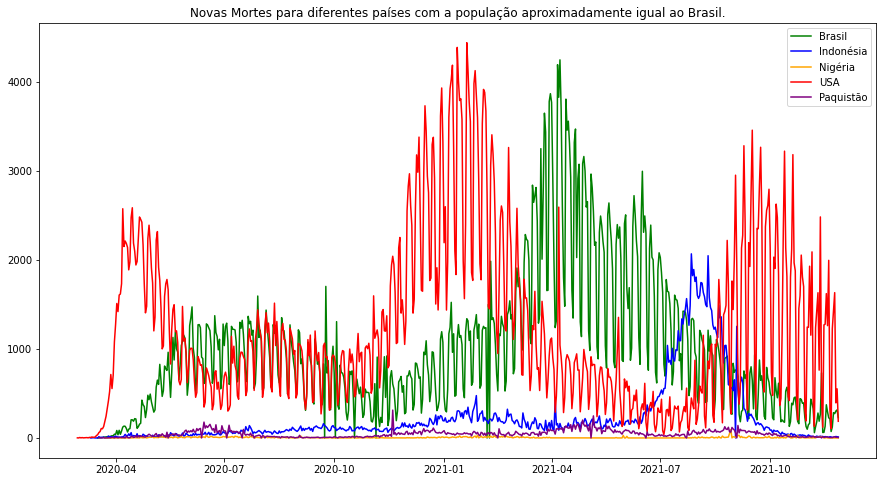

In [ ]:
# title and size
plt.figure(figsize=(15,8))
plt.title('Novas Mortes para diferentes países com a população aproximadamente igual ao Brasil.')

# graphics
plt.plot(brasil['date'], brasil['new_deaths'], markerfacecolor='green', markersize=12, color='green')
plt.plot(indonesia['date'], indonesia['new_deaths'], markerfacecolor='blue', markersize=12, color='blue')
plt.plot(nigeria['date'], nigeria['new_deaths'], markerfacecolor='orange', markersize=12, color='orange')
plt.plot(usa['date'], usa['new_deaths'], markerfacecolor='red', markersize=12, color='red')
plt.plot(pakistan['date'], pakistan['new_deaths'], markerfacecolor='purple', markersize=12, color='purple')

plt.legend(labels=['Brasil', 'Indonésia', 'Nigéria', 'USA', 'Paquistão'])

# show graph
plt.show()

### Vacinação

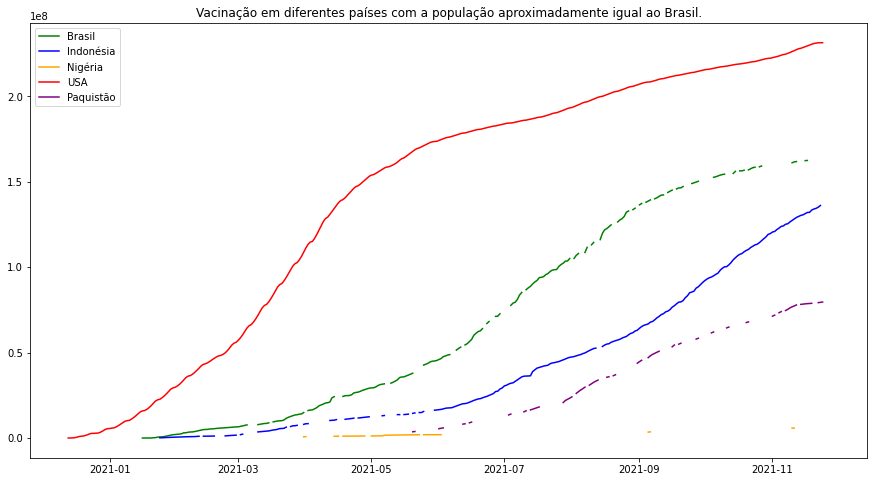

In [ ]:
# title and size
plt.figure(figsize=(15,8))
plt.title('Vacinação em diferentes países com a população aproximadamente igual ao Brasil.')

# graphics
plt.plot(brasil['date'], brasil['people_vaccinated'], markerfacecolor='green', markersize=12, color='green')
plt.plot(indonesia['date'], indonesia['people_vaccinated'], markerfacecolor='blue', markersize=12, color='blue')
plt.plot(nigeria['date'], nigeria['people_vaccinated'], markerfacecolor='orange', markersize=12, color='orange')
plt.plot(usa['date'], usa['people_vaccinated'], markerfacecolor='red', markersize=12, color='red')
plt.plot(pakistan['date'], pakistan['people_vaccinated'], markerfacecolor='purple', markersize=12, color='purple')

plt.legend(labels=['Brasil', 'Indonésia', 'Nigéria', 'USA', 'Paquistão'])

# show graph
plt.show()

## Países com altos índices de Desenvolvimento Humano

Para esta análise, levaremos em consideração a escala de desenvolvimento humano disponível no site Brasil Escola,
* A fonte das informações está disponível aqui: https://brasilescola.uol.com.br/geografia/desenvolvimento-humano.htm

De acordo com o site,
* IDH baixo: reúne todos os países que apresentam IDH abaixo de 0,500.

* IDH médio: países com IDH entre 0,500 e 0,799.

* IDH alto: países com desenvolvimento humano entre 0,800 e 0,899.

* IDH muito alto: países cujo índice encontra-se igual ou acima de 0,900.

In [ ]:
idh_alto = df.loc[df['human_development_index']>=0.8]

In [ ]:
paises_casos_vacinacao = pd.DataFrame(columns=['total_cases','total_people_vaccinated', 'idh'])

aux = []
for row in idh_alto['location'].unique():
    row_data = {}
    aux = df.loc[df['location']==row]
    
    #row_data['location'] = row
    row_data['total_cases'] = int(aux['new_cases'].sum())
    row_data['total_people_vaccinated'] = int(aux['people_vaccinated'].sum())
    row_data['idh'] = aux['human_development_index'].unique()

    row_df = pd.DataFrame.from_records([row_data])
    paises_casos_vacinacao = pd.concat([paises_casos_vacinacao, row_df], ignore_index=True)

paises_casos_vacinacao[['total_cases','total_people_vaccinated', 'idh']] = paises_casos_vacinacao[['total_cases','total_people_vaccinated', 'idh']].astype(float)
paises_casos_vacinacao


,total_cases,total_people_vaccinated,idh
0,16712.0,7.393300e+05,0.868
1,5325560.0,4.861683e+09,0.845
2,207984.0,2.335909e+09,0.944
3,1132805.0,1.159383e+09,0.922
4,22734.0,2.039525e+06,0.814
...,...,...,...
61,7903145.0,9.149476e+09,0.820
62,741858.0,9.284237e+08,0.890
63,10165779.0,1.193209e+10,0.932
64,48202462.0,4.943565e+10,0.926


# Aprendizado de Máquina

De acordo com o professor, na parte preditiva devem ser usados apenas 90% dos dados, a partir do início da pandemia, sendo que os 10% finais, mais recentes, devem ser usados para testar os modelos gerados, como se eles não fossem conhecidos na fase de aprendizado.

In [5]:
mask_inicial = (df['date'] < '2021-09-15')
mask_final = (df['date'] >= '2021-09-15')
inicial = df.loc[mask_inicial]
final = df.loc[mask_final]

In [6]:
#variavel não necessária para predição
inicial = inicial.drop(['date'], axis=1)
final = final.drop(['date'], axis=1)

## Feature Engineering
Transformando dados categóricos em números.

In [7]:
#label encoder
inicial = inicial.apply(skl.preprocessing.LabelEncoder().fit_transform)
final = final.apply(skl.preprocessing.LabelEncoder().fit_transform)

Limpando o dataset com nans e empty

In [12]:
#clean dataset
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

inicial = clean_dataset(inicial)
final = clean_dataset(final)

## Separando os Dados em Treino e Teste

In [17]:
#valores de entrada
x = inicial.drop(['new_cases'], axis=1).values

#valores de saída
y = inicial['new_cases'].values

#dividindo os dados em treino e teste
x_train90, x_test90, y_train90, y_test90 = train_test_split(x, y, test_size=0.2, random_state=42)
print('Tamanho do conjunto de Treino com 90%: {}'.format(len(x_train90)))
print('Tamanho do conjunto de Teste com 90%: {}'.format(len(x_test90)))

Tamanho do conjunto de Treino com 90%: 95588
Tamanho do conjunto de Teste com 90%: 23897


In [19]:
#valores de entrada
x = final.drop(['new_cases'], axis=1).values

#valores de saída
y = final['new_cases'].values

#dividindo os dados em treino e teste
x_train10, x_test10, y_train10, y_test10 = train_test_split(x, y, test_size=0.2, random_state=42)
print('Tamanho do conjunto de Treino com 10%: {}'.format(len(x_train10)))
print('Tamanho do conjunto de Teste com 10%: {}'.format(len(x_test10)))

Tamanho do conjunto de Treino com 10%: 13577
Tamanho do conjunto de Teste com 10%: 3395


## Árvore de Decisão

In [20]:
modelTree1 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=2, random_state=42)

In [22]:
#treinamento do modelo com 90% dos dados, relativos às datas iniciais da pandemia
modelTree1.fit(x_train90, y_train90)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [28]:
#teste do modelo com apenas 10% dos dados, relativos às datas finais, mais recentes, da pandemia
print("A acurácia do teste foi de:", accuracy_score(y_test10, modelTree1.predict(x_test10)))

A acurácia do teste foi de: 0.0014727540500736377


## Gaussian Naive Bayes

In [26]:
gnb = GaussianNB()

In [29]:
#treinamento do modelo com 90% dos dados, relativos às datas iniciais da pandemia
gnb.fit(x_train90, y_train90)

GaussianNB()

In [32]:
#teste do modelo com apenas 10% dos dados, relativos às datas finais, mais recentes, da pandemia
print("A acurácia do teste foi de:", accuracy_score(y_test10, gnb.predict(x_test10)))